**Name:** Zeeshan Aslam

**Course:** COSC525

**Submitted to:** Dr. Hector Santos





# Python Basics and Model Optimization Fundamentals

Welcome to your first homework. This exercise will introduce you to key Python functions and concepts, even if you've used Python before. This homework will guide the development of the building blocks for your own neural network model.

In this homework, you will
- Work with Python and Numpy to better understand matrix operations, dimensions, and interactions.
- You will also learn how to compute function parameter gradients and update these parameters to create a classification model.

**Instructions:**
- Use Python3 for all exercises.
- Install Numpy, MatplotLib, Pillow (pip3 install numpy, matplotlib, pillow)
- Install PyTorch and its components. This a little more elaborate because it is system dependent. Make sure you install torchvision for datasets. You will not use PyTorch in this homework. We are using the Torch library for easy access to datasets.
- Run all test cells for a superficial test of your functions. These tests are designed to help you with your assignment but do not rely on them for complete correctness. Your code will be assessed on a separate more comprehensive test set.

**Note on Numpy:**
- Numpy is a primary package for scientific computing in Python, and it's maintained by a large community (www.numpy.org). In this exercise, you will learn various crucial numpy functions such as `np.exp`, `np.log`, and `np.reshape`. It's essential to understand how to use these functions for your deep learning journey.

**Note on Jupyter Notebooks:**
- Remember to re-run cells from the start when restarting kernel.
- You can run a cell with the keyboard shortcut shift+enter


In [1]:
# version 1.0

## 1. Python Basics (20 Pts)


### Import needed Python libraries and functions [Do not Change]

In [2]:
# Here, importing some important libraries

import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.datasets as datasets
import copy
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageChops

If  the cell above executed without issues, you can continue. Otherwise, check your Python, Numpy, PyTorch, Matplotlib, and Pillow installations.

### 1.0. Quick Python and PyTorch test

In [3]:
# YOUR CODE STARTS HERE
test= "Python is working"
print(test)

test = torch.rand(5, 3)
if(test is not None):
    print("Torch is working")
# YOUR CODE ENDS HERE

Python is working
Torch is working


### 1.1 - Building sigmoid function with Numpy with np.exp()  (Points 3)

Build a function that returns the sigmoid of a numpy real vector or matrix $x$.

**Reminder**:
$sigmoid(x) = \frac{1}{1+e^{-x}}$

This function is sometimes also known as the logistic function. It is a non-linear function used not only in Machine Learning (Logistic Regression), but also in Deep Learning.

In [4]:
def sigmoid(x):
    """
    Compute sigmoid of x.

    Arguments:
    x -- A scalar or numpy vector or matrix

    Return:
    s -- sigmoid(x)
    """

    # YOUR CODE STARTS HERE

    s=1/(1 + np.exp(-x))  ##Here, the sigmoid activation function is implemented i.e. 1/1+e^-x, the output of sigmoid function is stored in variable s.

    # YOUR CODE ENDS HERE

    return s

In [5]:
# Create numpy array
a = np.array([1])

print("sigmoid([1]) = " + str(sigmoid(a))) ###Here, calling the sigmoid function.

if(sigmoid(a)[0] ==  0.7310585786300049):
    print("Test passed")

sigmoid([1]) = [0.73105858]
Test passed


### 1.2- Build Sigmoid Gradient (Points 3)
Computing gradients is an important step in backpropagation. In this exercise, you will compute the gradient (i.e., derivative) of the sigmoid function.

**Recall**
$$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))\tag{2}$$

In [6]:
def sigmoid_gradient(x):
    """
    Compute the gradient (also called the slope or derivative) of the sigmoid function with respect to its input x.

    Arguments:
    x -- A scalar or numpy array

    Return:
    ds -- Your computed gradient.
    """


    # YOUR CODE STARTS HERE

    ds=sigmoid(x)*(1-sigmoid(x)) ##Here, the derivative of the sigmoid function is computed w.r.t input x, which is stored in ds variable.

    # YOUR CODE ENDS HERE

    return ds

In [7]:
a = np.array([1, 2, 3])
print ("sigmoid_gradient(a) = " + str(sigmoid_gradient(a))) ####Here, calling the sigmoid_gradient function with three values.

if (np.array_equiv(np.round(sigmoid_gradient(a),8), np.array([0.19661193, 0.10499359, 0.04517666]))) :
    print("Test passed")

sigmoid_gradient(a) = [0.19661193 0.10499359 0.04517666]
Test passed


### 1.3- Vectorize Image (Points 4)

Implement `image2vector()` that takes an input of shape (length, height, depth) and returns a vector of shape (length\*height\*depth, 1).
- Don't hardcode the dimensions of image as a constant. Instead look up the quantities you need with `image.shape[0]`, etc.

In [8]:
def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)

    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """

    # YOUR CODE STARTS HERE

    length=image.shape[0] ###Here, getting the lenght of the input using .shape[0].
    height=image.shape[1] ###Here, getting the heigth of the input using .shape[1].
    depth =image.shape[2] ###Here, getting the depth of the input using .shape[2].
    v = image.reshape((length * height * depth, 1)) ###Here, reshapping the input to the required form of single dimension array.

    # YOUR CODE ENDS HERE

    return v

In [48]:
# Test
a_image = np.array([[[ 0.67826139,  0.29380381],
                     [ 0.90714982,  0.52835647],
                     [ 0.4215251 ,  0.45017551]],

                   [[ 0.92814219,  0.96677647],
                    [ 0.85304703,  0.52351845],
                    [ 0.19981397,  0.27417313]],

                   [[ 0.60659855,  0.00533165],
                    [ 0.10820313,  0.49978937],
                    [ 0.34144279,  0.94630077]]]) ##The input


vec_arr = image2vector(a_image) ##Here, calling the function with the input to get into the required form.

if (vec_arr[0]==0.67826139) & (vec_arr[6]==0.92814219) & (vec_arr[17]==0.94630077) & (vec_arr.shape[0]==18):
    print("Test passed")
print("The shape is: ", vec_arr.shape)

Test passed
The shape is:  (18, 1)


### 1.4 Implement the L1 and L2 loss functions (Points 5)

**Reminder**:
- The loss is used to evaluate the performance of your model. The bigger your loss is, the more different your predictions ($ \hat{y} $) are from the true values ($y$). In deep learning, you use optimization algorithms like Gradient Descent to train your model and to minimize the cost.
- L1 loss is defined as:
$$\begin{align*} & L_1(\hat{y}, y) = \sum_{i=0}^{m-1}|y^{(i)} - \hat{y}^{(i)}| \end{align*}\tag{6}$$
- L2 loss is defined as $$\begin{align*} & L_2(\hat{y},y) = \sum_{i=0}^{m-1}(y^{(i)} - \hat{y}^{(i)})^2 \end{align*}\tag{7}$$

In [10]:
def L1(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)

    Returns:
    loss -- the value of the L1 loss function defined above
    """

    #(≈ 1 line of code)

    # YOUR CODE STARTS HERE

    loss = np.sum(np.abs(y-yhat)) ##Here, the L1 loss is computed as given in the equation, which is assigned to the loss variable. #np.abs is used to get absolute value

    # YOUR CODE ENDS HERE

    return loss

def L2(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)

    Returns:
    loss -- the value of the L2 loss function defined above
    """

    #(≈ 1 line of code)
    # loss = ...

    # YOUR CODE STARTS HERE

    loss = np.sum(pow((y-yhat), 2)) ##Here, the L2 loss is computed as given in the equation, which is assigned to the loss variable. "pow() is used to compute power"

    # YOUR CODE ENDS HERE

    return loss

In [11]:
yhat = np.array([.9, 0.2, 0.1, .4, .9]) ##The predicted labels
y = np.array([1, 0, 0, 1, 1]) ##The actual labels


##comparrison to match the outputs
if (round(L1(yhat, y),5)==1.10000) & (round(L2(yhat, y),5)==0.43000):
    print("Test passed")

Test passed


### 1.5 - Normalizing rows (Points 5)

Another common technique we use in Machine Learning and Deep Learning is to normalize our data. It often leads to a better performance because gradient descent converges faster after normalization. Here, by normalization we mean changing x to $ \frac{x}{\| x\|} $ (dividing each row vector of x by its norm).

For example, if
$$x = \begin{bmatrix}
        0 & 3 & 4 \\
        2 & 6 & 4 \\
\end{bmatrix}\tag{3}$$
then
$$\| x\| = \text{np.linalg.norm(x, axis=1, keepdims=True)} = \begin{bmatrix}
    5 \\
    \sqrt{56} \\
\end{bmatrix}\tag{4} $$
and
$$ x\_normalized = \frac{x}{\| x\|} = \begin{bmatrix}
    0 & \frac{3}{5} & \frac{4}{5} \\
    \frac{2}{\sqrt{56}} & \frac{6}{\sqrt{56}} & \frac{4}{\sqrt{56}} \\
\end{bmatrix}\tag{5}$$


With `keepdims=True` the result will broadcast correctly against the original x.

`axis=1` means you are going to get the norm in a row-wise manner. If you need the norm in a column-wise way, you would need to set `axis=0`.

numpy.linalg.norm has another parameter `ord` where we specify the type of normalization to be done (in the exercise below you'll do 2-norm). To get familiar with the types of normalization you can visit [numpy.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)

\
\
**Implement normalize_rows**

Implement normalizeRows() to normalize the rows of a matrix. After applying this function to an input matrix x, each row of x should be a vector of unit length (meaning length 1).

In [12]:
def normalize_rows(x):
    """
    Implement a function that normalizes each row of the matrix x (to have unit length).

    Argument:
    x -- A numpy matrix of shape (n, m)

    Returns:
    x -- The normalized (by row) numpy matrix.
    """

    # YOUR CODE STARTS HERE

    row_norms = np.linalg.norm(x, axis=1, keepdims=True)  ###Here, calculation of the Euclidean norm along the second axis (axis=1), resulting in an array of norms corresponding to each row of x.

    x = x / row_norms  ### Here, dividing each row vector of x by its norms

    # YOUR CODE ENDS HERE

    return x

In [52]:
x = np.array([[0., 3., 7.],
              [1., 5., 4.]])
x_norm = np.round(normalize_rows(x), 5)
x_norm_true = np.round(np.array([[0., 0.3939193, 0.91914503],
                        [0.15430335, 0.77151675, 0.6172134 ]]), 5)
print("normalizeRows(x) = " + str(x_norm))

if((x_norm_true==x_norm).all()):
    print("Test Passed")


normalizeRows(x) = [[0.      0.39392 0.91915]
 [0.1543  0.77152 0.61721]]
Test Passed


## 2. Logistic Regression Model with NN Mindset (Points 50)

You will build a binary classification model using the logistic regression technique discussed in class. The model will discriminate the handwritten numbers zero and one from the MNIST dataset.

**Instructions**
- Download the MNIST dataset using the provided functions.
    - You will need to install PyTorch and Torchvision for the data loading functions to work.
    - The data loader functions will load the dataset to your local jupyter notebook root folder.
    - Make sure you have write permissions.
- You will build the following functions
    - Sigmoid function (Completed above)
    - Sigmoid derivative (Completed above)
    - Parameter initialization
    - Cost and gradient computations
    - Optimization
    - Model (integrates all the functions above)
    - Use the learned parameters to predict labels on test data
- Experiment with learning rates
- Analyze results

### 2.0 Load dataset [DO NOT CHANGE]

This code uses PyTorch torch and torchvision libraries to download the dataset from the web to your computer and then load the train and testing datasets to memory in the desired shape. Please do not change this code in anyway, because it can break the code  generated by the instructor.

It will be good to look into a PyTorch tutorial to learn more about these functions.
See link : https://pytorch.org/tutorials/beginner/basics/intro.html

The cell below will display one image example to ensure proper function of the code.

100%|██████████| 9912422/9912422 [00:00<00:00, 273546011.82it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 28705140.72it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 136494264.56it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13824766.89it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Label y = [0]. This is handwritten "0 - zero" picture.


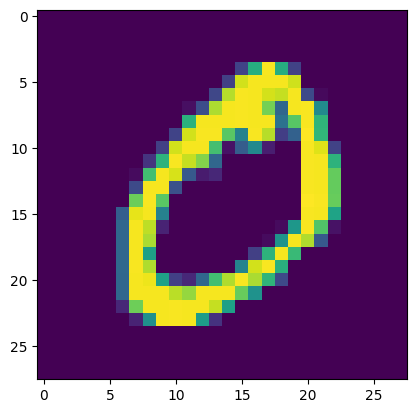

In [14]:
# DO NOT CHANGE CODE BELOW
#

# Download dataset from PyTorch website
data = datasets.MNIST(root='./data', train=True, download=True, transform=None)

# Load train data to memory
loader = torch.utils.data.DataLoader(data, batch_size=1)
data_set_x_orig = (loader.dataset.data).numpy()
data_set_y = (loader.dataset.targets).numpy().reshape(-1,1).T
classes = loader.dataset.classes

# Leave 1s and 0s on dataset
I1 = (data_set_y < 2)
data_set_x_orig = data_set_x_orig[I1.reshape(-1), :, :]
data_set_y = (data_set_y[I1].reshape(-1,1).T)


#Let's split training set in training and test set
mm = int(0.5*data_set_x_orig.shape[0])
train_set_x_orig = data_set_x_orig[:mm, :, :]
train_set_y = data_set_y[:,:mm]
test_set_x_orig = data_set_x_orig[mm+1:, :, :]
test_set_y = data_set_y[:,mm+1:]


#Display example of picture
index = 0
x = train_set_x_orig[index]
y = train_set_y[:, index]
c = classes[int(y.item())]
plt.imshow(train_set_x_orig[index])
print ("Label y = " + str(y) + ". This is handwritten \"" + c +  "\" picture.")

#
# DO NOT CHANGE CODE ABOVE

### 2.1 Print dimensions of data arrays (Points 3)
Find the values for:
- m_train (number of training examples)
- m_test (number of test examples)
- num_px (= height = width of a training image)

Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, depth). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`. For this experiment, we are working with grayscale images. So, depth is 1.

In [15]:
#################################
# Data arrays
#   - train_set_x_orig
#   - train_set_y
#   - test_set_x_orig
#   - test_set_y
#################################

# YOUR CODE STARTS HERE

m_train=train_set_x_orig.shape[0] ## number of training examples
m_test=test_set_x_orig.shape[0]  ## number of testing examples
num_px=train_set_x_orig.shape[1]  ## width of training examples

# YOUR CODE ENDS HERE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 1)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 6332
Number of testing examples: m_test = 6332
Height/Width of each image: num_px = 28
Each image is of size: (28, 28, 1)
train_set_x shape: (6332, 28, 28)
train_set_y shape: (1, 6332)
test_set_x shape: (6332, 28, 28)
test_set_y shape: (1, 6332)


Before proceeding ensure:
- Number of training samples: 6332
- Number of test samples: 6332
- Size of images: 28 x 28 x 1

### 2.2 Flatten input images (matrices) (Points 2)
As discussed in class, we need to flatten input matrices before ingesting them into our model. In this exercise you will perform that operation.

Reshape the training and test data sets so that images of size (num_px, num_px, 1) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 1, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use:
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [16]:
# Reshape the training and test examples
# train_set_x_flatten = ...
# test_set_x_flatten = ...

# YOUR CODE STARTS HERE

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T  ## Reshaping the training sets such as flattened into single vectors of shape (num_px  ∗  num_px  ∗  1, 1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T  ## Reshaping the testing sets such as flattened into single vectors of shape (num_px  ∗  num_px  ∗  1, 1)

# YOUR CODE ENDS HERE

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (784, 6332)
train_set_y shape: (1, 6332)
test_set_x_flatten shape: (784, 6332)
test_set_y shape: (1, 6332)


**Expected Output**:

<table style="width:35%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (784, 6332) </td>
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(1, 6332)</td>
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(784, 6332)</td>
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(1, 6332)</td>
  </tr>
</table>

### 2.3 Standardize input values (Points 3)

A critical step in machine learning is to standardize the inputs. This helps with quick convergence of the model's training cost.

RGB images (as the input in this dataset) have pixel integer values from 0-255. We will normalize these values to the floating point range of 0.-1.

Write code to standardize the flatten dataset from 0-255 to 0.-1 (float).

We will later learn in the class other techniques to standardize our datasets.

In [17]:
#####
# Standardize train_set_x_flatten and test_set_x_flatten into...
# train_set_x = ...
# test_set_x = ...

# YOUR CODE STARTS HERE

train_set_x = train_set_x_flatten / 255.0   ##normalizing training set values to the floating point range of 0.-1
test_set_x = test_set_x_flatten / 255.0     ##normalizing testing set values to the floating point range of 0.-1

# YOUR CODE ENDS HERE

### 2.4 Sigmoid function and its derivative
We already implemented the sigmoid function and its derivative in part 1 of this homework.

Below is a simple test to ensure the functions are defined and working properly. Guess what, we only need the sigmoid function to update our parameters.

In [18]:
# Create numpy array
a = np.round(np.array([0,2]), 5)
b = np.round(sigmoid(a), 5)

print("sigmoid([0,2]) = " + str(b))

if((b==np.array([0.5, 0.8808])).all()):
    print("Test passed")

sigmoid([0,2]) = [0.5    0.8808]
Test passed


### 2.5 Initialize parameters function (Points 2)
Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

In [19]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """

    # (≈ 2 lines of code)

    # YOUR CODE STARTS HERE

    w = np.zeros((dim, 1))   ##wight (w) parameter initialization with a vector of zeros.
    b = 0.

    # YOUR CODE ENDS HERE

    return w, b

In [20]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

if((w==np.array([0., 0.])).all()):
    print("Test passed")

w = [[0.]
 [0.]]
b = 0.0
Test passed


### 2.6 - Forward and Backward propagation (Points 20)

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- Input X, w, and b. The parameters w and b initialized with some arbitrary vector or number (e.g., vector of zeros or a zero).
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [21]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 1, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 1, number of examples)
    Y -- true "label" vector (containing 0 if image number is zero, 1 if image number is one) of size (1, number of examples)

    Return:
    grads -- dictionary containing the gradients of the weights and bias
            (dw -- gradient of the loss with respect to w, thus same shape as w)
            (db -- gradient of the loss with respect to b, thus same shape as b)
    cost -- negative log-likelihood cost for logistic regression

    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """

    m = float(X.shape[1])

    # FORWARD PROPAGATION (FROM X TO COST)
    # compute activation
    # A = ...
    # compute cost by using np.dot to perform multiplication.
    # And don't use loops for the sum.
    # cost = ...


    # YOUR CODE STARTS HERE

    A = 1 / (1 + np.exp(-(np.dot(w.T, X) + b))) ## Here, is the computation of A i.e. 1/1+e^-(wTx +b). (This is forward propagation)

    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) #logloss or Bnary cross entropy function (This is the cost function computation)

    # YOUR CODE ENDS HERE

    # BACKWARD PROPAGATION (TO FIND GRAD)
    # dw = ...
    # db = ...

    # YOUR CODE STARTS HERE

    dw = 1/m * np.dot(X, (A - Y).T)  ## Here is the derivation calculation of weight dw
    db = 1/m * np.sum(A - Y)   ## Here is the derivation calculation of bias db

    # YOUR CODE ENDS HERE

    cost = np.squeeze(np.array(cost))


    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [22]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

dw = np.round(grads["dw"],5)
db = np.round(grads["db"],5)
cost = np.round(cost,5)

assert type(dw) == np.ndarray
assert dw.shape == (2, 1)
assert type(db) == np.float64

print ("dw = " + str(dw))
print ("db = " + str(db))
print ("cost = " + str(cost))

if( (dw==np.array([[0.25072],[-0.06604]])).all() & (db.item()==-0.125) & (cost==0.15901)):
    print("Test passed.")

dw = [[ 0.25072]
 [-0.06604]]
db = -0.125
cost = 0.15901
Test passed.


### 2.7 - Optimization (Points 5)
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [23]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 1, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 1, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []

    for i in range(num_iterations):


        # Cost and gradient calculation
        # grads, cost = ...
        # YOUR CODE STARTS HERE

        grads, cost = propagate(w, b, X, Y)  #calling the propagate function to get gradients (w and b) and cost

        # YOUR CODE ENDS HERE

        # Retrieve derivatives dw and db from grads
        # YOUR CODE STARTS HERE

        dw = grads["dw"]
        db = grads["db"]

        # YOUR CODE ENDS HERE

        # update rule
        # w = ...
        # b = ...
        # YOUR CODE STARTS HERE

        w = w - learning_rate * dw   #Here is the updation of weight (w) parameter
        b = b - learning_rate * db    #Here is the updation of bias (b) parameter

        # YOUR CODE ENDS HERE

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [24]:
###########################
# DO NOT CHANGE

w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

#checking first element of each variable only
if ((np.round(params["w"][0].item(),5)==0.80956) and
    (np.round(params["b"].item(),5)==1.59487) and
    (np.round(grads["dw"][0].item(),6)==0.178605) and
    (np.round(grads["db"].item(),5)==-0.08888) and
    (np.round(costs[0].item(),4)==0.1590)):
    print("Test passed.")

# DO NOT CHANGE
###########################

w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [array(0.15900538)]
Test passed.


### 2.8 Predict (Points 10)
The **optimize** function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X.

#### 2.8.1 Implement the `predict_loop()` function. (Points 5)

There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`.

This implementation will use a *for loop* to iterate over the predictions. In the next exercise you will vectorize `predict_loop()` for faster execution.

In [25]:
def predict_loop(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 1, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 1, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a 1
    # A = ...
    # YOUR CODE STARTS HERE

    A = 1 / (1 + np.exp(-(np.dot(w.T, X) + b))) # Sigmoid function for forward propagation

    # YOUR CODE ENDS HERE

    for i in range(A.shape[1]):
      # Convert probabilities A[0,i] to actual predictions p[0,i]
      #(≈ 4 lines of code)
      # if A[0, i] > ____ :
      #     Y_prediction[0,i] =
      # else:
      #     Y_prediction[0,i] =

      # YOUR CODE STARTS HERE
      if A[0, i] > 0.5:
          Y_prediction[0, i] = 1
      else:
          Y_prediction[0, i] = 0

      # YOUR CODE ENDS HERE

    return Y_prediction

In [26]:
##Setting weigths, bias, input data, predictions as input

w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
YHAT = predict_loop(w, b, X)
print ("predictions = " + str(YHAT))
if((YHAT==np.array([[1.,1.,0.]])).all()):
   print("Test passed.")


predictions = [[1. 1. 0.]]
Test passed.


#### 2.8.2 Implement the `predict()` function. (Points 5)

It is the vectorized version of `predict_loop()`.

In [27]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 1, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 1, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    # A = ...
    # Then, write a vectorized version of the loop in predict_loop() to compute Y_prediction
    # Y_prediction = ...
    # YOUR CODE STARTS HERE

    A = 1 / (1 + np.exp(-(np.dot(w.T, X) + b)))

    # Vectorized version of the loop in predict_loop() to compute Y_prediction

    Y_prediction = np.where(A > 0.5, 1, 0)    ## to predict the value 1 if greater tha 0.5 (threshold), else 0.

    # YOUR CODE ENDS HERE

    return Y_prediction

In [28]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
YHAT = predict(w, b, X)
print ("predictions = " + str(YHAT))
if((YHAT==np.array([[1.,1.,0.]])).all()):
   print("Test passed.")

predictions = [[1 1 0]]
Test passed.


### 2.9 Integrate functions to generate a machine learning model (Points 5)

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

Implement the model function. Use the following notation:
- Y_prediction_test for your predictions on the test set
- Y_prediction_train for your predictions on the train set
- parameters, grads, costs for the outputs of optimize()

In [29]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the functions you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 1, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 1, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """
    # (≈ 1 line of code)
    # initialize parameters with zeros
    # and use the "shape" function to get the first dimension of X_train
    # w, b = ...

    w, b = initialize_with_zeros(X_train.shape[0])  ##Initialization of the w and b parameters.


    #(≈ 1 line of code)
    # Gradient descent
    # params, grads, costs = ...

    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)  ##Calling the optimize function to get updated parameters such as w, b, cost and

    # Retrieve parameters w and b from dictionary "params"
    # w = ...
    # b = ...

    w=params["w"]
    b=params["b"]

    # Predict test/train set examples (≈ 2 lines of code)
    # Y_prediction_test = ...
    # Y_prediction_train = ...

    # YOUR CODE STARTS HERE

    Y_prediction_test = predict(w, b, X_test)  ##Calling the predict function to get predictions for test dataset
    Y_prediction_train = predict(w, b, X_train) ##Calling the predict function to get predictions for training dataset

    # YOUR CODE ENDS HERE

    # Print train/test Errors
    train_accuracy = np.round(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100,3)
    test_accuracy = np.round(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100,3)

    if print_cost:
        print("\n\n########################################")
        print("train accuracy: {} %".format(train_accuracy))
        print("test accuracy: {} %".format(test_accuracy))
        print("########################################\n")


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train_accuracy": train_accuracy,
         "test_accuracy": test_accuracy}

    return d

#### Run your model

In [30]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1000, learning_rate=0.01, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.118477
Cost after iteration 200: 0.069830
Cost after iteration 300: 0.051633
Cost after iteration 400: 0.041947
Cost after iteration 500: 0.035867
Cost after iteration 600: 0.031663
Cost after iteration 700: 0.028566
Cost after iteration 800: 0.026179
Cost after iteration 900: 0.024277


########################################
train accuracy: 99.747 %
test accuracy: 99.716 %
########################################



#### Plot of training Cost

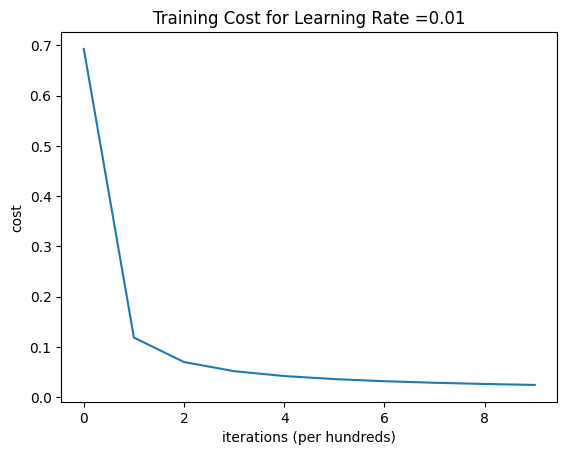

In [31]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Training Cost for Learning Rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

##It is seen that with LR 0.01, the model doing is good by minimizing the overall cost of the model.

## 3. Analysis of Results (Points 30)

The questions in this section will be part of your write up.

### 3.1 Choice of learning rate (Points 10)

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely $\left(\alpha \in (0,1)\right)$. The learning rate $\alpha$ determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.
**Task**
- Run the training algorithm for 5 different learning rates [0.001, 0.001, 0.01, 0.1, 0.5, 0.75].
- Plot the Cost for each experiment on the same figure.
- Document your observations. (For example, what can you say about cost convergence for the smallest learning rate?)
- Select the best learning rate and explain why you made that selection.
- For the selected learning rate, would you change the number of iterations `num_iterations`? Why?


Training a model with learning rate: 0.001
train accuracy: 99.621 %
test accuracy: 99.637 %

-------------------------------------------------------

Training a model with learning rate: 0.01
train accuracy: 99.747 %
test accuracy: 99.716 %

-------------------------------------------------------

Training a model with learning rate: 0.1
train accuracy: 99.842 %
test accuracy: 99.858 %

-------------------------------------------------------

Training a model with learning rate: 0.5
train accuracy: 99.905 %
test accuracy: 99.874 %

-------------------------------------------------------

Training a model with learning rate: 0.75
train accuracy: 99.921 %
test accuracy: 99.874 %

-------------------------------------------------------



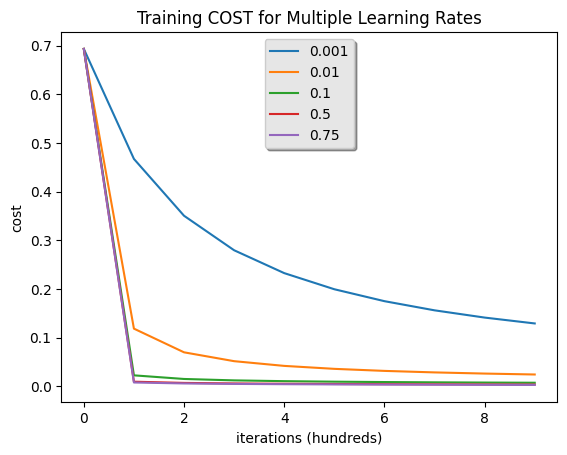

In [32]:
##The grid of selected learning rates are as  follows.

learning_rates = [0.001, 0.01, 0.1, 0.5, 0.75]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1000, learning_rate=lr, print_cost=False)
    print("train accuracy: {} %".format(models[str(lr)]["train_accuracy"]))
    print("test accuracy: {} %".format(models[str(lr)]["test_accuracy"]))
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')
plt.title("Training COST for Multiple Learning Rates")
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()





#### RESPONSE TO Exercise 3.1

**Q1. Document your observations. (For example, what can you say about cost convergence for the smallest learning rate?)**


**Answer 1.** A linear regression model is applied with different learning rates (LRs) and the performance of the model is shown in below plot.
The model is trained for 1000 iterations. With LR 0.001, the model is not good as shown in the plot.
It is seen that the model is minimizing the overall model's performance or cost with slow rate. The overall cost for total iterations is 0.2.
Whereas, with LR 0.01, the overall performance of the model is better than the LR 0.001, as the model is minimizing the cost faster than then the previous one.
The model gets a big jump in first 150 iterations and minimize cost until 0.1. After that, the cost minimization is very slow untill 1000 iterations and remains consistent about 0.05.
Whereas, the model performance with LR 0.1 is more better than the previous two LRs. It takes a big jump in first 150 iterations even better jump than the LR 0.01.
After that, the cost minimization remains same for this LR and reaches at 0.0 with 700 iterations.
Whereas, with LR 0.5 and 0.75, the cost minimization or overall model performance is more better than the previous LRs.
With these LRs, the model took more big steps than the previous LRs and reaches to the cost of 0.0 with about 150 iterations.
After that, the model performance remains same in terms of cost minimization such as the cost remains 0.0.

In general, with the smallest LR (0.001), the model's performance in terms of cost convergence is relatively slow.
The overall cost decreases gradually, and after 1000 iterations, it reaches a value of 0.2.
This slow convergence suggests that the LR is too small for the model to make significant progress in minimizing the cost within the given number of iterations.
Whereas, with LR 0.5, the model took bigger step and minimizes the cost with less iterations as compared to other LRs. In this case, with higher LR, the model is performing good.

---

**Q2. Select the best learning rate and explain why you made that selection.**


**Asnwer 2.** The best LR depends on the trade-off between convergence speed and stability. A very high LR may cause the model to overshoot the minimum, leading to instability and oscillations.
Therefore, in this case, LRs of 0.5 and 0.75 provide fast convergence to a cost of 0.0.
However, the difference in performance between these two rates is minimal.
In this case, I will prefer to choose the more conservative option, 0.5, to avoid potential oscillations.
The reason is that with LR 0.5, the model took bigger steps and minimizes the cost with less iterations as compared to other LRs.
In conclusion, the LR of 0.5 appears to be the best choice, striking a balance between convergence speed and stability.

---

**Q3. For the selected learning rate, would you change the number of iterations num_iterations? Why?**


**Answer 3.** With the selected LR of 0.5, the model reaches at the cost of 0.0 around 150 iterations.
Further iterations do not significantly improve the cost, indicating that the model has already converged.
So, if computational resources are a concern, then reducing the number of iterations could save my processing time without sacrificing much in terms of model performance.
Changing the number of iterations may not be necessary in this case.
If computational resources are a concern, then I will select 200 iterations with the LR of 0.5.


If computational resources are a concern, reducing the number of iterations could save processing time without sacrificing much in terms of model performance.
In conclusion, the LR of 0.5 appears to be the best choice, striking a balance between convergence speed and stability. The selected learning rate provides rapid convergence to a minimal cost, and there is no immediate need to change the number of iterations given the achieved convergence.

---


### 3.2 Training to classify numbers 4 and 8 (Points 10)

#### Understanding the Current Dataset and Task
- Initially, we have a dataset with images of digits (0 to 9).
- Each image is stored in a matrix called `X`.
- Each image has a label (the digit it represents), stored in a vector called `Y`.
- Currently, we're only using images of 0s and 1s. So, `X` has images of 0s and 1s, and `Y` has labels 0 and 1 respectively.

#### Changing the Task to Classify 4s and 8s
- Now, we want to change the task. Instead of classifying 0s and 1s, we want to classify 4s and 8s.
- This means we need to use images of 4s and 8s in `X` and their labels (4 and 8) in `Y`.

### Adapting the Training and Prediction Routines
- Can you rerun your training and prediction routines as is? Assuming X is comprised of the 4s and 8s images and Y has the corresponding labels (4 and 8).
- What changes or additions are needed? Think about the role of the sigmoid function.
- Please provide a detailed explanation of your solution.

#### RESPONSE TO Exercise 3.2

#### **Response to Excercise 3.2**

#### **Changing the Task to Classify 4s and 8s**
- **Now, we want to change the task. Instead of classifying 0s and 1s, we want to classify 4s and 8s.**
- **This means we need to use images of 4s and 8s in `X` and their labels (4 and 8) in `Y`.**

---

**Answer.** To accomplish this task, I have started with the training of the model with the dataset of images (X) with 4s and 8s. I have used the images of 4s and 8s in `X` and their labels (4 and 8) in `Y`. As the logic to select the 4s and 8s images are as follows:

> **I1 = (data_set_y == 4) | (data_set_y == 8)**

After selection of the dataset with 4s and 8s, I have to go through some training routine changes such as the main adjustments involve updating the labels in Y to represent 4s and 8s, and ensuring that the sigmoid activation function and the cost function are suitable for binary classification. The sigmoid function provides the output in the range of 0 and 1, for which I have to adapt the prediction routine. The prediction routine needs adjustments to interpret the results in the context of the new task. Since, I am dealing with the binary classification in terms of (4 or 8), the threshold for predicting a class should be set at 0.5. Therefore, I have adjusted the function as, if the sigmoid output is greater than 0.5, classify it as an 8; otherwise, classify it as a 4. The prediction routine is defined as follows:

> **Y_prediction = np.where(A > 0.5, 8, 4)**

Then, the defined logistic regression model is trained and evaluated to predict the images of 4s and 8s. To predict, the model is applied on the MNIST images as well as I have captured the images of 4s and 8s with whitebackground to perform this task, as shown in the below code section. The model performs good for 8s (1) than the 4s (0).

### **Adapting the Training and Prediction Routines**
- **Can you rerun your training and prediction routines as is? Assuming X is comprised of the 4s and 8s images and Y has the corresponding labels (4 and 8).**

---

**Answer1.** To adapt the training and prediction routines for the task of classifying 4s and 8s, I need to make some changes in the code. The main adjustments involve updating the labels in Y to represent 4s and 8s, and ensuring that the sigmoid activation function and the cost function are suitable for binary classification in the training routine. So, I can rerun the training routine as is, but the prediction routine requires the adjustment to interpret the results in the context of the new task. So, to deal with the binary classification (4 or 8) task, the threshold for predicting a class should be set at 0.5 such as greater than 0.5 will be 8; otherwise, it will be considered as 4. No major changes are needed for the new task, as the sigmoid function inherently handles binary classification.

- **What changes or additions are needed? Think about the role of the sigmoid function.**
---
**Answer2.** To classify the 4s and 8s using the defined logistic regression model instead of 0s and 1s, several key modifications are implemented. The key changes are as follows:

> **I1 = (data_set_y == 4) | (data_set_y == 8)**

> **Y_prediction = np.where(A > 0.5, 8, 4)**

Initially, the labels in vector Y are updated, transforming 0s to represent 4s and 1s to represent 8s. Afterwards, the sigmoid activation function, which provides the output to a range between 0 and 1, is retained, as it suits the binary nature of the new classification task. The cost function is then adjusted to accommodate the revised labels and the sigmoid activation output, with the log_loss being employed, a standard choice for binary classification problems. Additionally, the sigmoid function is modified to ensure compatibility with the logistic regression model tailored for the recognition of 4s and 8s. The prediction routine undergoes a crucial change in the threshold for predictions; if the sigmoid output exceeds 0.5, the model classifies it as an 8; otherwise, it is categorized as a 4. These adaptations collectively align the logistic regression model with the specifics of the new dataset, optimizing its performance for the targeted binary classification of 4s and 8s.

Therefore, by making these adjustments, the model can be trained and used for the new task of classifying 4s and 8s. The modified prediction function will output predictions for 4s and 8s based on the updated threshold.

- **Please provide a detailed explanation of your solution.**
---
**Answer3.**
To adapt the linear regression model originally trained for 0s and 1s images for 4s and 8s, the detailed solution is discussed as follows. For the adaption of the defined model, there are some modification required on prediction end to classify 4s and 8s. Initially, the labels in vector Y are updated, transforming 0s to represent 4s and 1s to represent 8s. Afterwards, the sigmoid activation function is evaluated, which provides the output to a range between 0 and 1, is retained, as it suits the binary nature of the new classification task.
Then, the modifications introduced in the predict function are crucial for adapting the model to the new task of classifying images as either representing class 4 or class 8. No major changes are needed for the new task, as the sigmoid function already defined to inherently handle the binary classification task. Following this, a thresholding mechanism is applied at 0.5 to make binary predictions. If the calculated probability surpasses 0.5, the image is classified as representing class 8; otherwise, it is designated as class 4. Afterwards, the updated model is trained to learn about the representation of 4s and 8s in the data.

In adapting the function for the new classification task, these modifications showcase the effectiveness of using the sigmoid activation function and tailored thresholding for binary classification. The solution ensures a seamless transition to classifying images as either class 4 or class 8, underscoring the flexibility and versatility of the logistic regression model. The model is evaluated for both MNIST and real-time captured images of 4s and 8s, as shown in the following code sections. It is important to mention that the real-time captured images of 4s and 8s are adjusted with respect to contrast level and inverted background of images to match with the training data. It is noted that the model is performing good. So, in terms of results, the model performs better for the class 8 than the other class.

In summary, the already defined linear regression model with modifications in prediction routines can be used for the new task of classifying 4s and 8s with minimal changes. The sigmoid activation function's role is crucial for obtaining probabilities and thresholding at 0.5 facilitates the binary classification decision.

Task for 4s and 8s

Saving IMG_4.jpg to IMG_4.jpg
Saving IMG_8.jpg to IMG_8.jpg


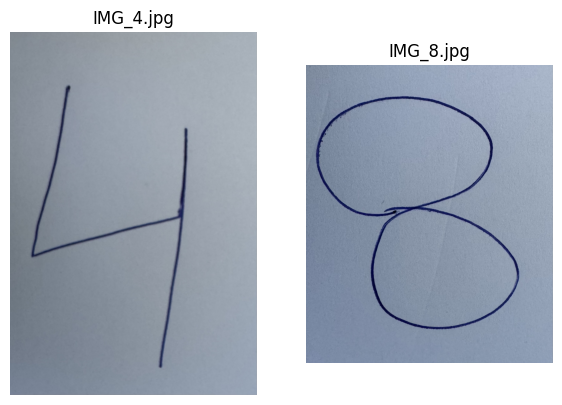

In [33]:
###The captured images are shown as follows###
from google.colab import files
import io
uploaded_files = files.upload()
file_names = list(uploaded_files.keys())
# Create a subplot with one row and five columns

fig, axes = plt.subplots(1, 2, figsize=(7, 5))

for i in range(2):
    # Read image from the uploaded files
    image = Image.open(io.BytesIO(uploaded_files[file_names[i]]))

    # Display the image
    axes[i].imshow(image)
    axes[i].axis('off')  # Turn off axis labels

    # Set the title as the file name
    axes[i].set_title(file_names[i])

plt.show()

###The real-time captured files are displayed as follows##########

Label y = [4]. This is handwritten "4 - four" picture.
Number of training examples: m_train = 5846
Number of testing examples: m_test = 5846
Height/Width of each image: num_px = 28
Each image is of size: (28, 28, 1)
train_set_x shape: (5846, 28, 28)
train_set_y shape: (1, 5846)
test_set_x shape: (5846, 28, 28)
test_set_y shape: (1, 5846)
train_set_x_flatten shape: (784, 5846)
train_set_y shape: (1, 5846)
test_set_x_flatten shape: (784, 5846)
test_set_y shape: (1, 5846)


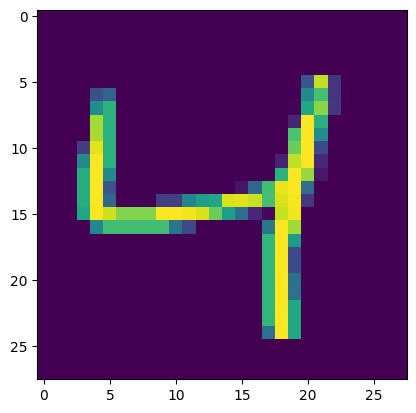

In [34]:
# DO NOT CHANGE CODE BELOW

# Download dataset from PyTorch website
data = datasets.MNIST(root='./data', train=True, download=True, transform=None)

# Load train data to memory
loader = torch.utils.data.DataLoader(data, batch_size=1)
data_set_x_orig = (loader.dataset.data).numpy()
data_set_y = (loader.dataset.targets).numpy().reshape(-1,1).T
classes = loader.dataset.classes

# Leave 1s and 0s on dataset ,
# to select dataset with 4s and 8s  "I1 = (data_set_y == 4) | (data_set_y == 8)"
I1 = (data_set_y == 4) | (data_set_y == 8)
data_set_x_orig = data_set_x_orig[I1.reshape(-1), :, :]
data_set_y = (data_set_y[I1].reshape(-1,1).T)


#Let's split training set in training and test set
mm = int(0.5*data_set_x_orig.shape[0])
train_set_x_orig = data_set_x_orig[:mm, :, :]
train_set_y = data_set_y[:,:mm]
test_set_x_orig = data_set_x_orig[mm+1:, :, :]
test_set_y = data_set_y[:,mm+1:]


#Display example of picture
index = 0
x = train_set_x_orig[index]
y = train_set_y[:, index]
c = classes[int(y.item())]
plt.imshow(train_set_x_orig[index])
print ("Label y = " + str(y) + ". This is handwritten \"" + c +  "\" picture.")

#
# DO NOT CHANGE CODE ABOVE
#################################
# Data arrays
#   - train_set_x_orig
#   - train_set_y
#   - test_set_x_orig
#   - test_set_y
#################################

# YOUR CODE STARTS HERE

m_train=train_set_x_orig.shape[0] ## number of training examples
m_test=test_set_x_orig.shape[0]  ## number of testing examples
num_px=train_set_x_orig.shape[1]  ## width of training examples

# YOUR CODE ENDS HERE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 1)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T  ## Reshaping the training sets such as flattened into single vectors of shape (num_px  ∗  num_px  ∗  1, 1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T  ## Reshaping the testing sets such as flattened into single vectors of shape (num_px  ∗  num_px  ∗  1, 1)

# YOUR CODE ENDS HERE

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

#####
# Standardize train_set_x_flatten and test_set_x_flatten into...
# train_set_x = ...
# test_set_x = ...

# YOUR CODE STARTS HERE

train_set_x = train_set_x_flatten / 255.0   ##normalizing training set values to the floating point range of 0.-1
test_set_x = test_set_x_flatten / 255.0     ##normalizing testing set values to the floating point range of 0.-1

# YOUR CODE ENDS HERE


In [35]:
def predict_4_8(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 1, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 1, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    # A = ...
    # Then, write a vectorized version of the loop in predict_loop() to compute Y_prediction
    # Y_prediction = ...
    # YOUR CODE STARTS HERE

    A = 1 / (1 + np.exp(-(np.dot(w.T, X) + b)))

    # Vectorized version of the loop in predict_loop() to compute Y_prediction

    Y_prediction = np.where(A > 0.5, 8, 4)  #The classify 8 if output value is exceding threshold, else 4.

    # YOUR CODE ENDS HERE

    return Y_prediction
#############################################
## YOUR CODE STARTS HERE


In [36]:
# GRADED FUNCTION: model

def model_2(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the functions you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 1, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 1, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """
    # (≈ 1 line of code)
    # initialize parameters with zeros
    # and use the "shape" function to get the first dimension of X_train
    # w, b = ...

    w, b = initialize_with_zeros(X_train.shape[0])  ##Initialization of the w and b parameters.


    #(≈ 1 line of code)
    # Gradient descent
    # params, grads, costs = ...

    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)  ##Calling the optimize function to get updated parameters such as w, b, cost and

    # Retrieve parameters w and b from dictionary "params"
    # w = ...
    # b = ...

    w=params["w"]
    b=params["b"]

    # Predict test/train set examples (≈ 2 lines of code)
    # Y_prediction_test = ...
    # Y_prediction_train = ...

    # YOUR CODE STARTS HERE

    Y_prediction_test = predict_4_8(w, b, X_test)  ##Calling the predict function to get predictions for test dataset
    Y_prediction_train = predict_4_8(w, b, X_train) ##Calling the predict function to get predictions for training dataset

    # YOUR CODE ENDS HERE

    # Print train/test Errors
    train_accuracy = np.round(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100,3)
    test_accuracy = np.round(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100,3)

    if print_cost:
        print("\n\n########################################")
        print("train accuracy: {} %".format(train_accuracy))
        print("test accuracy: {} %".format(test_accuracy))
        print("########################################\n")


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train_accuracy": train_accuracy,
         "test_accuracy": test_accuracy}

    return d

In [ ]:
logistic_regression_model_2 = model_2(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1000, learning_rate=0.01, print_cost=False)

Real-time captured image of 8 based prediction

y = 8, your algorithm predicts a "8 - eight" picture.


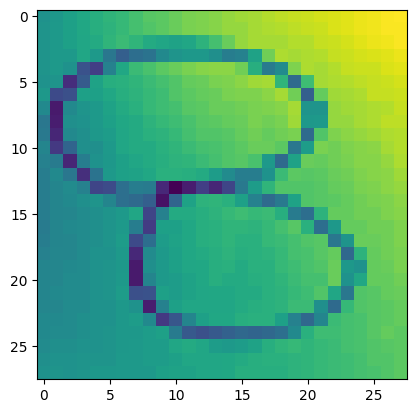

In [38]:
# change this to the name of your image file and data folder
my_image = "IMG_8.jpg"
fname = "/content/" + my_image

## YOUR CODE ENDS HERE
#############################################

# Load and reshape the image to fit algorithm.
image = Image.open(fname).convert('L').resize((num_px, num_px))

# Do you need to manipulate your image to fit the training data?
#############################################
## YOUR CODE STARTS HERE
#The contrast level of the real-time captured image is adjusted.

contrast_factor = 1.6  # The contrast of image adjusted with respective factor here
enhancer = ImageEnhance.Contrast(image)
image = enhancer.enhance(contrast_factor)

## YOUR CODE ENDS HERE
#############################################


# Preprocess the image to fit your algorithm.
image = np.array(image)
#Normalize
image = image.astype(float) / 255.0

# Display image
plt.imshow(image)

# Flatten inputs
image = image.reshape((1, num_px * num_px)).T

# Attempt at categorizing image
my_predicted_image = predict_4_8(logistic_regression_model_2["w"], logistic_regression_model_2["b"], image)

my_predicted_image = np.squeeze(my_predicted_image)

print("y = " + str(my_predicted_image)
      + ", your algorithm predicts a \"" + classes[int(my_predicted_image)] +  "\" picture.")

MNIST dataset based prediction

y = 8, your algorithm predicts a "8 - eight" picture.


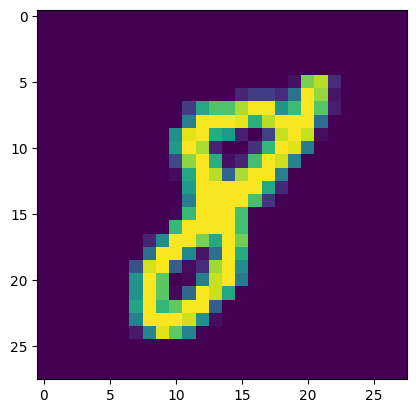

In [39]:
################################################################################################################################################
##################################################################### Mnist dataset  ###########################################################
# Preprocess the image to fit your algorithm.

image = np.array(train_set_x_orig[2])
#Normalize
image = image.astype(float) / 255.0

# Display image
plt.imshow(image)

# Flatten inputs
image = image.reshape((1, num_px * num_px)).T

# Attempt at categorizing image
my_predicted_image = predict_4_8(logistic_regression_model_2["w"], logistic_regression_model_2["b"], image)

my_predicted_image = np.squeeze(my_predicted_image)

print("y = " + str(my_predicted_image)
      + ", your algorithm predicts a \"" + classes[int(my_predicted_image)] +  "\" picture.")

### 3.3 Try your one handwritten 0 or 1 (Points 10)

**Tasks**
1. Handwrite a zero or one in a white page.
2. Take a picture of your number and crop the image with a squared layout.
3. Save the picture to the data folder in JPG format and with filename `my_image.jpg`. Same folder where the MNIST dataset is located.
4. Run the code below and document your observations.
5. Is the model predicting the right number?
    - Feel free to try different handwritten 1s and 0s at different illumination conditions.
    - Examine the original MNIST images.
        - Are there any differences between the MNIST images and your images?
        - What is the contrast between the number and the background?
            - HINT: `ImageEnhance.Contrast(factor)`. Try factor $\in (1.1, 1.9)$.
            - https://pillow.readthedocs.io/en/stable/reference/ImageEnhance.html
        - What is the pixel value of the background?
            - HINT: `ImageChops.invert()`
            - https://pillow.readthedocs.io/en/stable/reference/ImageChops.html
    - Do you need to update the code below to make your images better match the characteristics of the training data?
    - Update the code accordingly.
6. Make sure to try these steps with at least one 0 and one 1.
7. Document your observations and intuition.

Handwritten 0s and 1s

Saving IMG_1N.jpg to IMG_1N.jpg
Saving IMG_0.jpg to IMG_0.jpg
Saving IMG_1.jpg to IMG_1.jpg
Saving IMG_2N.jpg to IMG_2N.jpg
Saving IMG_3N.JPG to IMG_3N.JPG


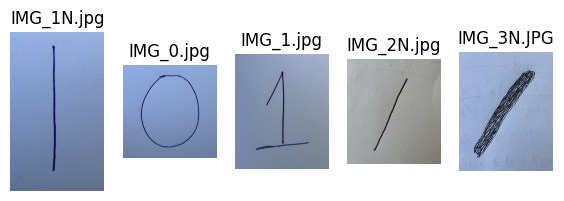

In [40]:
###The captured images are shown as follows###
from google.colab import files
import io
uploaded_files = files.upload()
file_names = list(uploaded_files.keys())
# Create a subplot with one row and five columns

fig, axes = plt.subplots(1, 5, figsize=(7, 5))

for i in range(5):
    # Read image from the uploaded files
    image = Image.open(io.BytesIO(uploaded_files[file_names[i]]))

    # Display the image
    axes[i].imshow(image)
    axes[i].axis('off')  # Turn off axis labels

    # Set the title as the file name
    axes[i].set_title(file_names[i])

plt.show()

###The captured files are displayed as follows##########

### Response 3.3

**Tasks**
1. **Handwrite a zero or one in a white page.**
2. **Take a picture of your number and crop the image with a squared layout.**
3. **Save the picture to the data folder in JPG format and with filename `my_image.jpg`. Same folder where the MNIST dataset is located.**
4. **Run the code below and document your observations.**


**Answer1-4.** I have captured the five images of 1s and 0s on white page, as shown in the above section of code. The images are cropped by manually in squared layout. After capturing the images, the images are uploaded in the colab repository using .jpg formate. Then, I run the following code and it is seen that the defined linear regression model trained for 1s and 0s is not predicting the true classes of given images. I have captured the 1s with different orientations to match the style of MNIST images and it is noticed that the model is not working good for the real images. The defined model works well for class 0, whereas it is less efficient to detect 1s. It misclassifies the 1 as 0, as shown in following code cells of the notebook.

---
5. **Is the model predicting the right number?**

**Answer(5).** The model shows accurate prediction for the class 0, whereas it misclassifies the 1s. The linear regression model trained for 1s and 0s are used to predict the real-time captured images. The linear regression model is tried with different accents and orientations of 1s, however it is less accurate to predict the real images of 1s. Therefore, the model is not predicting the right number except for 0s.

---
- **Feel free to try different handwritten 1s and 0s at different illumination conditions.**

**Answer(5a).** Upon capturing four different images of the digit 1 with various orientations to align with the style of MNIST images, it has become evident that the performance of the defined logistic regression model is suboptimal for these real images. Whereas, the model exhibits proficiency in accurately classifying instances of digit 0, its effectiveness diminishes when confronted with the task of detecting digit 1. Notably, the model tends to misclassify the digit 1 as 0. This observation underscores a limitation in the model's generalization to real-world variations in the presentation of digit 1, prompting the need for further refinement or consideration of alternative approaches to enhance its performance, particularly in scenarios involving different orientations of the digit 1.

---

- **Examine the original MNIST images.**
- **Are there any differences between the MNIST images and your images?**

**Answer(5b).** The observed differences between the MNIST images and the captured images of the digit 1 could be attributed to variations in orientation and style. The efforts were made to align the orientations of the captured 1s with the style of MNIST images, as shown in the above code cell of the notebook. The model's performance may still be affected by factors such as variability in writing style, contrast, orienttation and potential distortions introduced during the capturing process. In this case, it is noted that the defined logistic regression model works effectively for classifying 0s but exhibits less efficiency in detecting 1s. The misclassification of 1s as 0s suggests a potential limitation in the model's ability to generalize well to different variations of the digit 1.

---
- **What is the contrast between the number and the background?**
       - HINT: `ImageEnhance.Contrast(factor)`. Try factor $\in (1.1, 1.9)$.
       - https://pillow.readthedocs.io/en/stable/reference/ImageEnhance.html

**Answer(5c).** By following the above mentioned information, I have tried different contrast level values ranging from 1.1 to 1.9, as shown in the following code sections. However, the specified model is less efficient to accurately predict the 1s class. I have tried different images of 1s with different contrast levels, but the model has less potential to predict the 1s image as 1. The different contrast levels are applied to the five real images of 1s and 0s, as shown in the following five code cells of the notebook.

---

- **What is the pixel value of the background?**
      - HINT: `ImageChops.invert()`
      - https://pillow.readthedocs.io/en/stable/reference/ImageChops.html
  
**Answer(5d).** After analyzing the performance of the linear regression model by varying the different contrast values, I have tried to invert the image and analyze the pixel values of the background using ImageChops.invert(). The reason of inverting background is that it can provide insights into potential differences between the backgrounds of the real images and the MNIST dataset. Therefore, it is noted that the defined logistic regression model exhibits less prediction ability in detecting 1s. The misclassification of 1s as 0s suggests a potential limitation in the model's ability to generalize well to different variations of the digit 1. The inversion of the background is performed for the five real images of 1s and 0s, as shown in the following five code cells of the notebook.

---

  - **Do you need to update the code below to make your images better match the characteristics of the training data? Update the code accordingly.**

**Answer(5e).** In order to better analyze the prediction ability of the model, the below mentioned code is updated to apply different contrast level of the images as well as to invert the background of the images. The updated code is shown in the following five code cells of this notebook. However, it is seen from different contrast values, inverting background of images and using different styles of writing that the defined linear regression model is unable to predict the digits for the real images. The model shows less efficiency is detecting class 1 as compared to class 0. The experiemnt is performed for different images of 1s and 0s with different styles.

---
6. **Make sure to try these steps with at least one 0 and one 1.**
**Answer(6).** To analyze the prediction ability of the linear regression model, I have tried the above mentioned steps for five different images of 1s and 0. The abovementioned steps are performed for four images of 1s with different styles of 1s to match the MNIST images and one image of 0, as shown in the following five code cells of the notebook. These images are tried with different contrast values ranging from 1.1 to 1.9, inverting background of images and with different writing styles. However, the model is less efficient for 1s class than the 0s.

---

7. **Document your observations and intuition.**
**Answer(7).** To analyze the performance of the linear regression model, I have performed different experiments by capturing the real images. For the experimentation, I took pictures of handwritten 1s and 0s and applied different changes like cropping, resizing, inverting and adjusting contrast. Despite my efforts to make the 1s look like MNIST images, the model struggled to predict them accurately. It did well with 0s but faced difficulties with different styles and orientations of 1s. When I compared the original MNIST images to my captured ones, I noticed differences in writing style, contrast and potential distortions introduced during capturing. Therefore, I captured images with different writing styles and orientations. The model consistently misclassified 1s as 0s, indicating challenges in adapting to diverse representations of digit 1.

Afterwards, I tried adjusting contrast with different factors and inverting the background, but the model's performance remained suboptimal for digit 1. The misclassification remains same, highlighting the model's struggle with varying contrast levels and backgrounds. Furthermore, in response to these observations, I updated the code to include contrast adjustments and background inversion. Unfortunately, the results confirmed the model's difficulty in accurately predicting digit 1. This suggests the need for further improvements or alternative approaches to enhance its ability to handle diverse real-world scenarios.

In general, the linear regression model worked well for digit 0 but faced challenges with digit 1, especially when dealing with different styles, contrast levels and orientations. These findings emphasize the importance of testing for robustness and exploring potential model enhancements to ensure better performance in various real-world situations.

#### RESPONSE TO Exercise 3.3

y = 0, your algorithm predicts a "0 - zero" picture.


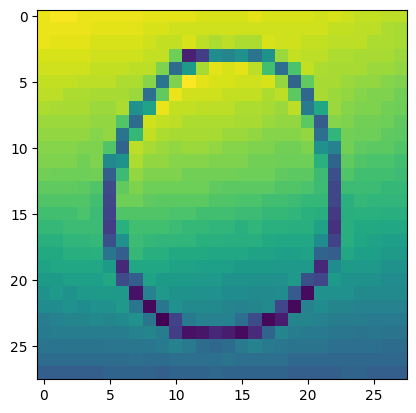

In [46]:
# change this to the name of your image file and data folder
my_image = "IMG_0.jpg"
fname = "/content/" + my_image

## YOUR CODE ENDS HERE
#############################################

# Load and reshape the image to fit algorithm.
image = Image.open(fname).convert('L').resize((num_px, num_px))


# Do you need to manipulate your image to fit the training data?
#############################################
## YOUR CODE STARTS HERE

contrast_factor = 1.5  # You can adjust this factor as needed
enhancer = ImageEnhance.Contrast(image)
image = enhancer.enhance(contrast_factor)


## YOUR CODE ENDS HERE
#############################################


# Preprocess the image to fit your algorithm.
image = np.array(image)
#Normalize
image = image.astype(float) / 255.0

# Display image
plt.imshow(image)

# Flatten inputs
image = image.reshape((1, num_px * num_px)).T

# Attempt at categorizing image
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

my_predicted_image = np.squeeze(my_predicted_image)

print("y = " + str(my_predicted_image)
      + ", your algorithm predicts a \"" + classes[int(my_predicted_image)] +  "\" picture.")

y = 0, your algorithm predicts a "0 - zero" picture.


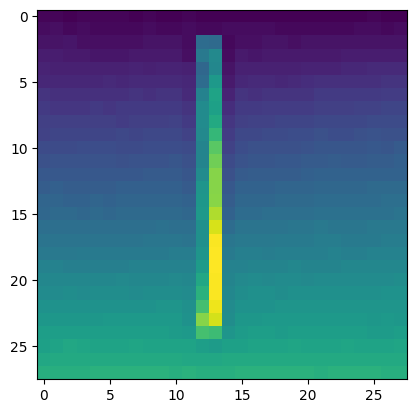

In [41]:
# change this to the name of your image file and data folder
my_image = "IMG_1N.jpg"
fname = "/content/" + my_image

## YOUR CODE ENDS HERE
#############################################

# Load and reshape the image to fit algorithm.
image = Image.open(fname).convert('L').resize((num_px, num_px))


# Do you need to manipulate your image to fit the training data?
#############################################
## YOUR CODE STARTS HERE

contrast_factor = 1.5  # You can adjust this factor as needed
enhancer = ImageEnhance.Contrast(image)
image = enhancer.enhance(contrast_factor)


image = ImageChops.invert(image)  # Inverted background here

## YOUR CODE ENDS HERE
#############################################

# Preprocess the image to fit your algorithm.
image = np.array(image)
#Normalize
image = image.astype(float) / 255.0

# Display image
plt.imshow(image)

# Flatten inputs
image = image.reshape((1, num_px * num_px)).T

# Attempt at categorizing image
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

my_predicted_image = np.squeeze(my_predicted_image)

print("y = " + str(my_predicted_image)
      + ", your algorithm predicts a \"" + classes[int(my_predicted_image)] +  "\" picture.")

y = 0, your algorithm predicts a "0 - zero" picture.


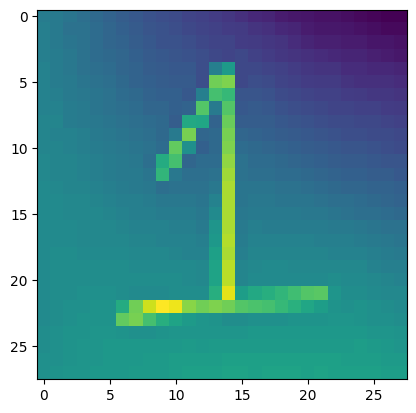

In [43]:
# change this to the name of your image file and data folder
my_image = "IMG_1.jpg"
fname = "/content/" + my_image

## YOUR CODE ENDS HERE
#############################################

# Load and reshape the image to fit algorithm.
image = Image.open(fname).convert('L').resize((num_px, num_px))


# Do you need to manipulate your image to fit the training data?
#############################################
## YOUR CODE STARTS HERE
contrast_factor = 1.9  # You can adjust this factor as needed
enhancer = ImageEnhance.Contrast(image)
image = enhancer.enhance(contrast_factor)


# Invert background
image = ImageChops.invert(image)


## YOUR CODE ENDS HERE
#############################################


# Preprocess the image to fit your algorithm.
image = np.array(image)
#Normalize
image = image.astype(float) / 255.0

# Display image
plt.imshow(image)

# Flatten inputs
image = image.reshape((1, num_px * num_px)).T

# Attempt at categorizing image
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

my_predicted_image = np.squeeze(my_predicted_image)

print("y = " + str(my_predicted_image)
      + ", your algorithm predicts a \"" + classes[int(my_predicted_image)] +  "\" picture.")

y = 0, your algorithm predicts a "0 - zero" picture.


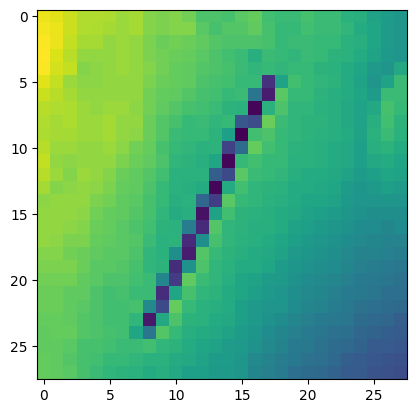

In [44]:
# change this to the name of your image file and data folder
my_image = "IMG_2N.jpg"
fname = "/content/" + my_image

## YOUR CODE ENDS HERE
#############################################

# Load and reshape the image to fit algorithm.
image = Image.open(fname).convert('L').resize((num_px, num_px))


# Do you need to manipulate your image to fit the training data?
#############################################
## YOUR CODE STARTS HERE

contrast_factor = 1.9  # You can adjust this factor as needed
enhancer = ImageEnhance.Contrast(image)
image = enhancer.enhance(contrast_factor)

# Invert background
#image = ImageChops.invert(image)

## YOUR CODE ENDS HERE
#############################################


# Preprocess the image to fit your algorithm.
image = np.array(image)
#Normalize
image = image.astype(float) / 255.0

# Display image
plt.imshow(image)

# Flatten inputs
image = image.reshape((1, num_px * num_px)).T

# Attempt at categorizing image
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

my_predicted_image = np.squeeze(my_predicted_image)

print("y = " + str(my_predicted_image)
      + ", your algorithm predicts a \"" + classes[int(my_predicted_image)] +  "\" picture.")

y = 0, your algorithm predicts a "0 - zero" picture.


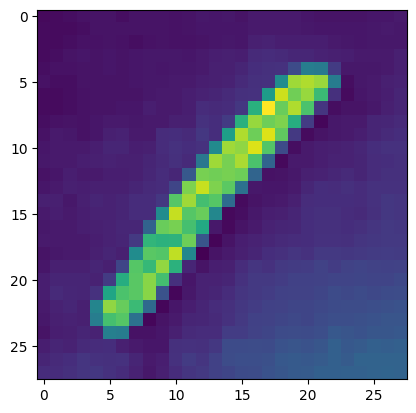

In [45]:
# change this to the name of your image file and data folder
my_image = "IMG_3N.JPG"
fname = "/content/" + my_image

## YOUR CODE ENDS HERE
#############################################

# Load and reshape the image to fit algorithm.
image = Image.open(fname).convert('L').resize((num_px, num_px))


# Do you need to manipulate your image to fit the training data?
#############################################
## YOUR CODE STARTS HERE

contrast_factor = 1.2  # You can adjust this factor as needed
enhancer = ImageEnhance.Contrast(image)
image = enhancer.enhance(contrast_factor)

image = ImageChops.invert(image)

## YOUR CODE ENDS HERE
#############################################


# Preprocess the image to fit your algorithm.
image = np.array(image)
#Normalize
image = image.astype(float) / 255.0

# Display image
plt.imshow(image)

# Flatten inputs
image = image.reshape((1, num_px * num_px)).T

# Attempt at categorizing image
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

my_predicted_image = np.squeeze(my_predicted_image)

print("y = " + str(my_predicted_image)
      + ", your algorithm predicts a \"" + classes[int(my_predicted_image)] +  "\" picture.")

# Congratulations you have completed your first homework!